<a href="https://colab.research.google.com/github/ArySuby/Proyecto_CoderDS_SUBY_Ary2daparte/blob/main/ModeloMerlu2004_2024SinEdadCero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- Setup inicial ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving merluza2004_2024SINEDAD0.xlsx to merluza2004_2024SINEDAD0.xlsx


In [3]:
df = pd.read_excel("merluza2004_2024SINEDAD0.xlsx", parse_dates=["fecha"])

In [4]:
df["sexo"] = df["sexo"].astype(str).str.strip()


In [5]:
print(df["sexo"].unique())

['2' '1']


In [6]:
print(df["sexo"].value_counts(dropna=False))


sexo
2    99909
1    68468
Name: count, dtype: int64


In [7]:
print(df["largo_tot"].min())


15


In [8]:
print([int(x) for x in sorted(df["largo_tot"].unique())])


[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 95]


In [9]:
# --- Previsualizar ---
print("Primeras filas:")
print(df.head())
print(len(df))
print("\nColumnas disponibles:", df.columns.tolist())

Primeras filas:
       fecha  n_ejemp  largo_tot sexo  edad
0 2016-01-05        1         16    2     1
1 2016-01-05        2         19    1     1
2 2016-01-05        3         25    1     1
3 2016-01-05        4         26    1     1
4 2016-01-05        5         27    1     2
168377

Columnas disponibles: ['fecha', 'n_ejemp', 'largo_tot', 'sexo', 'edad']


In [10]:
# --- Preprocesamiento ---
# Convertir fecha a datetime
df["fecha"] = pd.to_datetime(df["fecha"], errors='coerce')

# Eliminar filas con valores faltantes en columnas relevantes
df = df.dropna(subset=["largo_tot", "sexo", "edad", "fecha"])

In [11]:
# Variables predictoras y objetivo
X = df[["largo_tot", "sexo"]].copy()
y = df["edad"]

# Codificar sexo
X["sexo"] = X["sexo"].astype("category").cat.codes

In [12]:
# --- División de datos ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [13]:
# --- Modelo Lineal ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# --- Modelo No Lineal (Random Forest) ---
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [14]:
# --- Evaluación ---
def evaluar_modelo(nombre, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n{nombre} - RMSE:", rmse)
    print(f"{nombre} - R2:", r2)

evaluar_modelo("Regresión Lineal", y_test, y_pred_lr)
evaluar_modelo("Random Forest", y_test, y_pred_rf)


Regresión Lineal - RMSE: 0.7092958743964561
Regresión Lineal - R2: 0.735684218829671

Random Forest - RMSE: 0.6563285963421315
Random Forest - R2: 0.7736862816899442


In [15]:
# Coeficientes del modelo
coeficientes = pd.DataFrame(lr.coef_, X.columns, columns=["Coeficiente"])
print(coeficientes)

           Coeficiente
largo_tot     0.129074
sexo         -0.456213


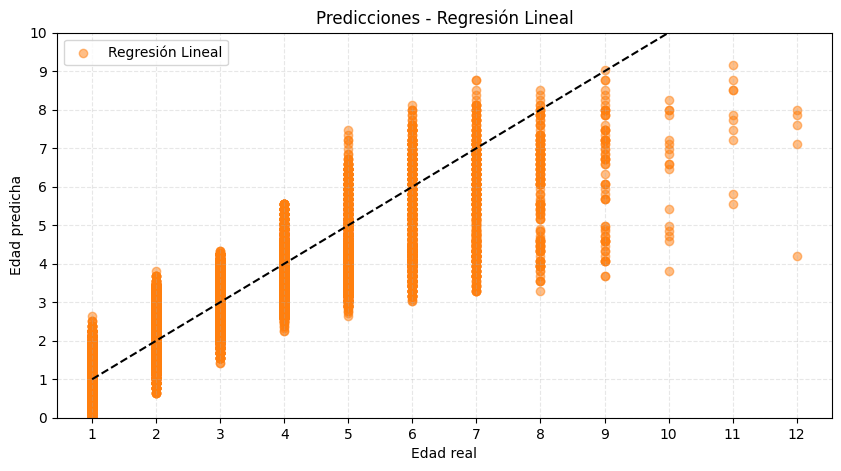

In [16]:
# --- Visualización solo para Regresión Lineal ---
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Regresión Lineal", color='C1')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

plt.xlabel("Edad real")
plt.ylabel("Edad predicha")
plt.legend()
plt.title("Predicciones - Regresión Lineal")

# Establecer ticks de a uno en uno
plt.xticks(np.arange(y_test.min(), y_test.max() + 1, 1))
plt.yticks(np.arange(0, 11, 1))
plt.ylim(0, 10)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

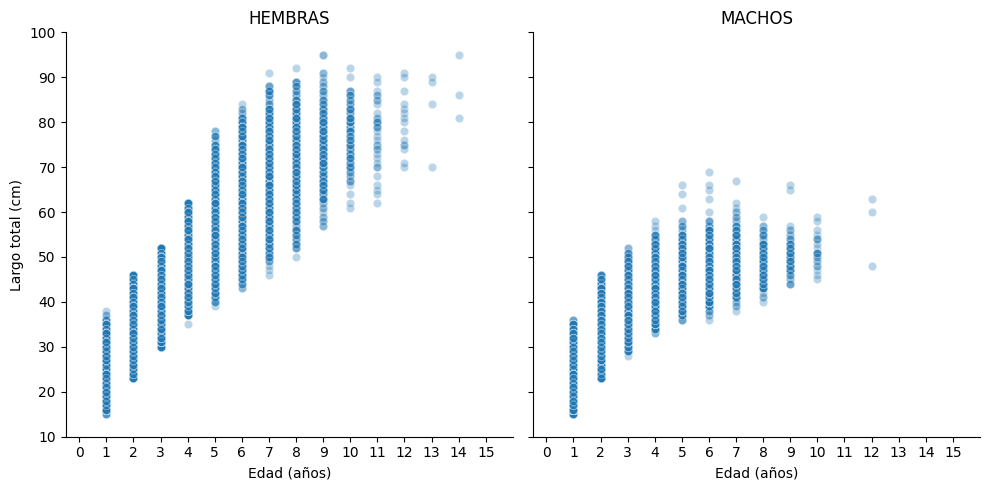

In [17]:
# Diccionario para los títulos y colores
sexo_labels = {1: "MACHOS", 2: "HEMBRAS"}
colores = {1: "blue", 2: "red"}

# FacetGrid por sexo con palette para los colores
g = sns.FacetGrid(df, col="sexo", height=5, aspect=1, palette=colores)

# Usar map_dataframe para graficar con ejes invertidos
g.map_dataframe(sns.scatterplot, x="edad", y="largo_tot", alpha=0.3)

# Etiquetas y ejes
g.set_axis_labels("Edad (años)", "Largo total (cm)")
g.set(xticks=np.arange(0, 16, 1))       # Eje X (edad): de 0 a 12, paso 1
g.set(xlim=(-0.5, 16))                  # Limites del eje X
g.set(yticks=np.arange(10, 101, 10))      # Eje Y (largo): de 10 a 90, paso 5
g.set(ylim=(10, 100))                    # Limites del eje Y

# Reemplazar títulos por MACHOS y HEMBRAS
for ax, title in zip(g.axes.flat, g.col_names):
    ax.set_title(sexo_labels[int(title)])

plt.tight_layout()
plt.show()


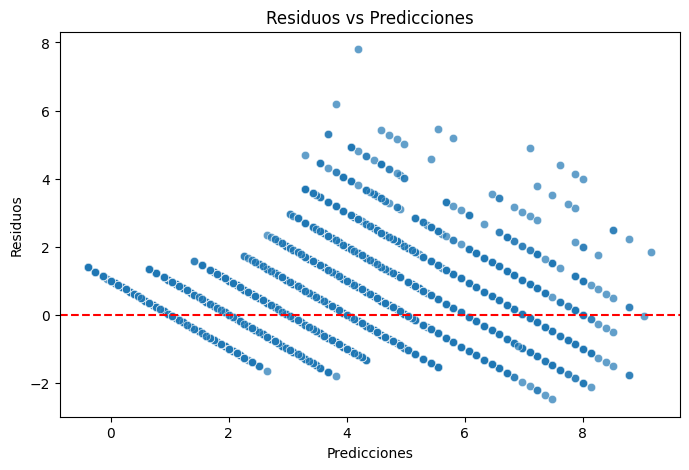

In [18]:
###SUPUESTOS A CUMPLIR###
#### 1-Linealidad: la relación entre las variables predictoras y la variable objetivo es lineal.###
#### 2-Homoscedasticidad: los residuos deben tener varianza constante.####

# Calcular residuos
y_pred = lr.predict(X_test)
residuos = y_test - y_pred

# Gráfico de residuos vs predicciones
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicciones")
plt.show()


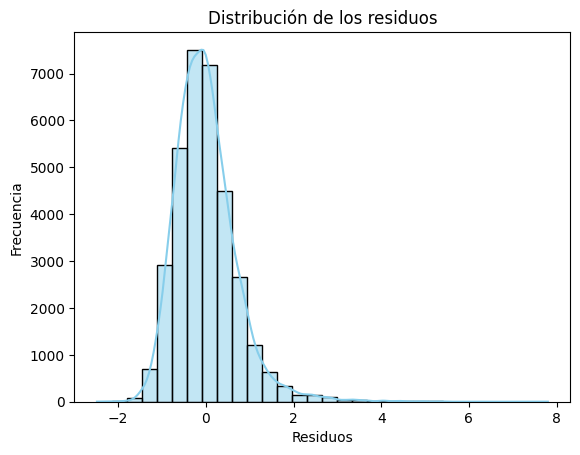

In [19]:
####SUPUESTO 3 - Prueba de normalidad de los residuos###
sns.histplot(residuos, kde=True, bins=30, color='skyblue')
plt.title("Distribución de los residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()


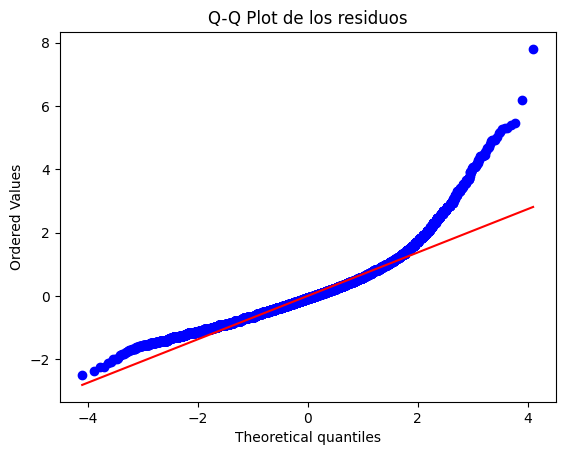

In [20]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot de los residuos")
plt.show()


<Axes: xlabel='residuos', ylabel='Count'>

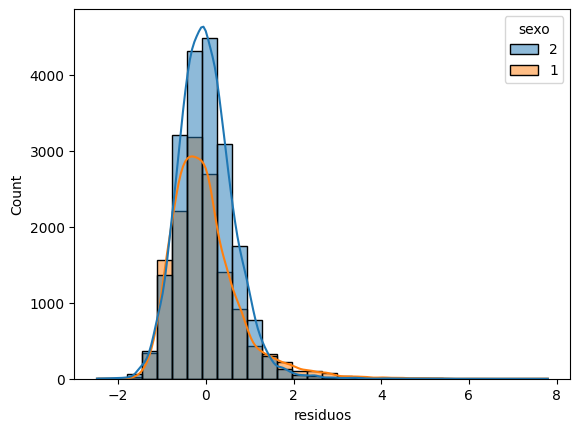

In [21]:
df["residuos"] = residuos
sns.histplot(data=df, x="residuos", hue="sexo", kde=True, bins=30)

Porcentaje de acierto - Regresión Lineal: 59.34%


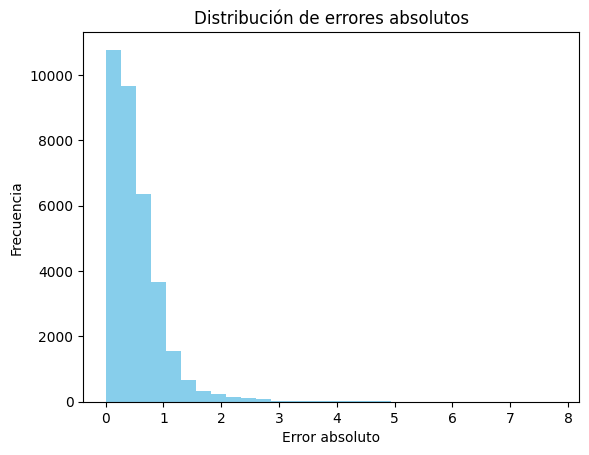

In [22]:
# Predicciones del modelo lineal
predicciones_lr = y_pred_lr

# 20% de margen de error
margen_error = 0.20
limite_superior = y_test * (1 + margen_error)
limite_inferior = y_test * (1 - margen_error)

# Calcular aciertos
aciertos = (predicciones_lr >= limite_inferior) & (predicciones_lr <= limite_superior)
porcentaje_acierto_lr = aciertos.mean() * 100
print(f"Porcentaje de acierto - Regresión Lineal: {porcentaje_acierto_lr:.2f}%")

# Calcular errores absolutos y graficar histograma
errores = abs(y_test - predicciones_lr)
plt.hist(errores, bins=30, color='skyblue')
plt.xlabel("Error absoluto")
plt.ylabel("Frecuencia")
plt.title("Distribución de errores absolutos")
plt.show()

        edad  predicciones_lr   errores
191       10         5.617549  4.382451
1661       9         4.326811  4.673189
3792       9         4.068663  4.931337
4003      14         8.000960  5.999040
4056      12         5.746623  6.253377
...      ...              ...       ...
167819     9         4.903189  4.096811
167892     9         3.681441  5.318559
168032     9         3.939589  5.060411
168138     8         3.681441  4.318559
168155    11         6.581148  4.418852

[193 rows x 3 columns]


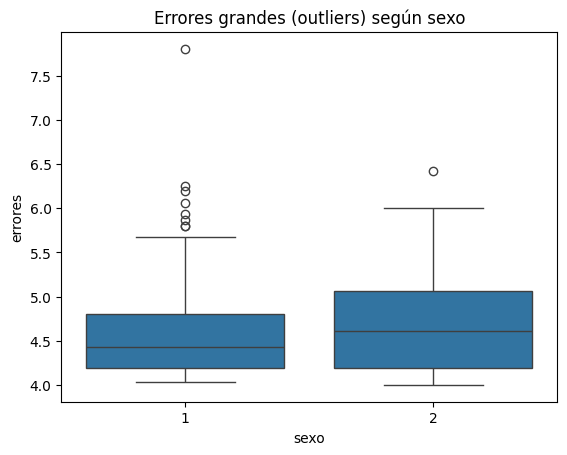

In [23]:
# Predecir para todo el DataFrame
y_pred_lr_full = lr.predict(X)  # Usar X completo, no solo X_test

# Agregar las predicciones al DataFrame
df["predicciones_lr"] = y_pred_lr_full

# Calcular los errores absolutos
df["errores"] = abs(df["edad"] - df["predicciones_lr"])

# Filtrar los outliers (errores absolutos mayores a 4)
outliers = df[df["errores"] > 4]

# Mostrar los outliers
print(outliers[["edad", "predicciones_lr", "errores"]])

# Visualización de outliers según sexo
sns.boxplot(data=outliers, x="sexo", y="errores")
plt.title("Errores grandes (outliers) según sexo")
plt.show()



        edad  predicciones_lr   errores
4003      14         8.000960  5.999040
4056      12         5.746623  6.253377
14547     10         4.972180  5.027820
21154     10         4.197737  5.802263
28592     10         4.326811  5.673189
37255     10         4.714032  5.285968
37599      9         3.939589  5.060411
40922     10         4.972180  5.027820
41121     10         4.455884  5.544116
45177     10         4.326811  5.673189
57276     10         4.584958  5.415042
63157     14         8.646330  5.353670
69866     10         4.584958  5.415042
74503     10         4.068663  5.931337
77107      9         3.681441  5.318559
83493     10         4.843106  5.156894
84124     12         6.581148  5.418852
88671      9         3.810515  5.189485
89244     10         3.810515  6.189485
91822      9         3.810515  5.189485
92677     12         4.197737  7.802263
108678     9         3.681441  5.318559
113953    10         4.584958  5.415042
122739    12         6.710222  5.289778


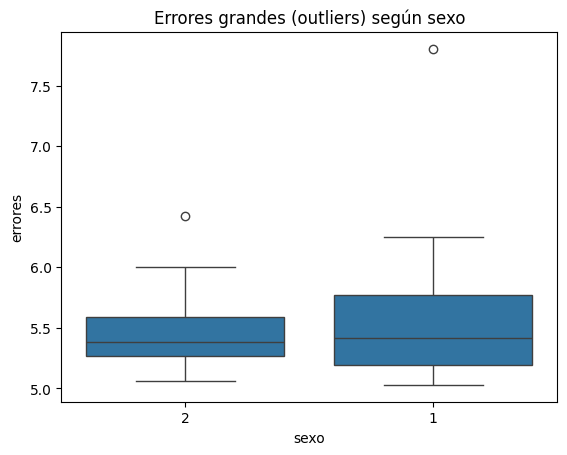

In [24]:
# Calcular los errores absolutos
df["errores"] = abs(df["edad"] - df["predicciones_lr"])

# Filtrar los outliers (errores absolutos mayores a 5)
outliers = df[df["errores"] > 5]

# Mostrar los outliers
print(outliers[["edad", "predicciones_lr", "errores"]])

# Visualización de outliers según sexo
sns.boxplot(data=outliers, x="sexo", y="errores")
plt.title("Errores grandes (outliers) según sexo")
plt.show()


In [25]:
# Filtrar los ejemplares con un residuo mayor o igual a 6
outliers = df[df["errores"] >= 6]

# Mostrar largo, edad y sexo de los ejemplares con error mayor o igual a 6
print(outliers[["edad", "largo_tot", "sexo", "errores"]])


        edad  largo_tot sexo   errores
4056      12         60    1  6.253377
89244     10         45    1  6.189485
92677     12         48    1  7.802263
135116    13         70    2  6.418852
152419    10         46    1  6.060411


In [26]:
# Reemplazar 0 por 2 (hembras)
X_test["sexo"] = X_test["sexo"].replace(0, 2)


In [27]:
print(X_test["sexo"].value_counts())


sexo
1    19979
2    13697
Name: count, dtype: int64


In [28]:
# --- Armar DataFrame con resultados ---
df_resultados = X_test.copy()
df_resultados["edad_real"] = y_test
df_resultados["edad_predicha"] = y_pred_lr

# --- Calcular métricas separadas por sexo ---
for sexo_valor in [1, 2]:
    sub = df_resultados[df_resultados["sexo"] == sexo_valor]

    # 1. Acierto con margen del 20%
    margen_error = 0.20
    limite_sup = sub["edad_real"] * (1 + margen_error)
    limite_inf = sub["edad_real"] * (1 - margen_error)
    aciertos_20 = ((sub["edad_predicha"] >= limite_inf) & (sub["edad_predicha"] <= limite_sup)).mean() * 100

    # 2. Acierto exacto (redondeando la predicción)
    aciertos_exactos = (sub["edad_predicha"].round() == sub["edad_real"]).mean() * 100

    # 3. Acierto con margen de ±1 año
    aciertos_margen1 = (abs(sub["edad_predicha"] - sub["edad_real"]) <= 1).mean() * 100

    print(f"--- {'MACHO' if sexo_valor == 1 else 'HEMBRA'} ---")
    print(f"Acierto con margen del 20%: {aciertos_20:.2f}%")
    print(f"Acierto exacto (redondeo): {aciertos_exactos:.2f}%")
    print(f"Acierto con ±1 año de diferencia: {aciertos_margen1:.2f}%\n")


--- MACHO ---
Acierto con margen del 20%: 63.06%
Acierto exacto (redondeo): 60.93%
Acierto con ±1 año de diferencia: 90.24%

--- HEMBRA ---
Acierto con margen del 20%: 53.92%
Acierto exacto (redondeo): 52.13%
Acierto con ±1 año de diferencia: 85.81%



In [29]:
# --- Armar DataFrame con resultados ---
df_resultados = X_test.copy()
df_resultados["edad_real"] = y_test
df_resultados["edad_predicha"] = y_pred_lr

# --- Calcular métricas separadas por sexo y por tamaño ---
for sexo_valor in [1, 2]:
    for condicion, filtro_texto in [(df_resultados["largo_tot"] < 30, "Menores a 30 cm"),
                                    (df_resultados["largo_tot"] >= 30, "Mayores o iguales a 30 cm")]:

        sub = df_resultados[(df_resultados["sexo"] == sexo_valor) & condicion]

        if len(sub) == 0:
            continue  # evitar divisiones por cero si no hay datos

        # 1. Acierto con margen del 20%
        margen_error = 0.20
        limite_sup = sub["edad_real"] * (1 + margen_error)
        limite_inf = sub["edad_real"] * (1 - margen_error)
        aciertos_20 = ((sub["edad_predicha"] >= limite_inf) & (sub["edad_predicha"] <= limite_sup)).mean() * 100

        # 2. Acierto exacto (redondeando la predicción)
        aciertos_exactos = (sub["edad_predicha"].round() == sub["edad_real"]).mean() * 100

        # 3. Acierto con margen de ±1 año
        aciertos_margen1 = (abs(sub["edad_predicha"] - sub["edad_real"]) <= 1).mean() * 100

        print(f"--- {'MACHO' if sexo_valor == 1 else 'HEMBRA'} ({filtro_texto}) ---")
        print(f"Acierto con margen del 20%: {aciertos_20:.2f}%")
        print(f"Acierto exacto (redondeo): {aciertos_exactos:.2f}%")
        print(f"Acierto con ±1 año de diferencia: {aciertos_margen1:.2f}%\n")


--- MACHO (Menores a 30 cm) ---
Acierto con margen del 20%: 31.75%
Acierto exacto (redondeo): 63.31%
Acierto con ±1 año de diferencia: 92.67%

--- MACHO (Mayores o iguales a 30 cm) ---
Acierto con margen del 20%: 65.85%
Acierto exacto (redondeo): 60.72%
Acierto con ±1 año de diferencia: 90.03%

--- HEMBRA (Menores a 30 cm) ---
Acierto con margen del 20%: 31.05%
Acierto exacto (redondeo): 63.34%
Acierto con ±1 año de diferencia: 99.65%

--- HEMBRA (Mayores o iguales a 30 cm) ---
Acierto con margen del 20%: 57.14%
Acierto exacto (redondeo): 50.55%
Acierto con ±1 año de diferencia: 83.86%

